In [1]:
from plotnine import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from pandas.api.types import CategoricalDtype
from datetime import datetime
from Utilities import T_test
plt.rcParams['figure.figsize'] = [20, 8]

In [2]:
filtered_df = pd.read_csv('./0803Data/0803_Final_filtered_df.csv',encoding='utf-16')

In [3]:
final_proj = filtered_df['project_id'].unique().tolist()

In [4]:
df = pd.read_csv('./0803Data/analysis_data.csv',encoding='utf-16')

In [5]:
df = df[df['project_id'].isin(final_proj)]
df = df.reset_index(drop=True)

### 선행 연구에서 유의미하게 나타났던 Feature
#### Numerical

1.	Duration of project(1-60 days with average 30 days)
2.	The goal amount
3.	The number of images  
4.	The presence of videos
5.	The duration of videos
6.  The number of update 

In [6]:
# http://www.databaser.net/moniwiki/wiki.php/%EC%9D%B4%EC%83%81%EC%B9%98%EC%A0%9C%EA%B1%B0%EB%B0%A9%EB%B2%95
# outlier-제거
def find_outlier_treshold(df,column):
    summary = df[column].describe()
    Q1 = summary['25%']
    Q3 = summary['75%']
    IQR = Q3 - Q1    
    return Q1, Q3, IQR

def check_outlier(value,Q1,Q3,IQR):
    if (value < Q1 - (1.5 * IQR)) or (value > Q3 + (1.5 * IQR)):
        return True
    else:
        return False

def filter_outlier(df,column):
    Q1, Q3, IQR = find_outlier_treshold(df,column)
    value_list = df[column].tolist()
    removed_outlier_list = list(filter(lambda x: check_outlier(x, Q1, Q3, IQR) != True, value_list))
    diff = len(value_list) - len(removed_outlier_list)
    print('Number of filtered value : {0}, Removed number of value : {1}'.format(len(removed_outlier_list),diff))
    
    # column이름
    filtered_df = df[df[column].isin(removed_outlier_list)]
    
#     new_column = 'filtered_' + column
#     removed_outlier_df = pd.DataFrame({new_column : removed_outlier_list})
    return filtered_df

In [7]:
filter_outlier(df,'project_goal').head()

Number of filtered value : 887, Removed number of value : 113


,project_id,project_launched_at,project_deadline,project_goal,project_category,date,days_to_go,pledged,options_number,title_count,...,diff,success,backer1,backer2,backer3,ratio1,ratio2,ratio3,top_category,super_category
0,1002877193,1559689942,1562281942,3000.0,Video Games,1.562213e+09,19.0,3217.0,9.0,13.0,...,2.0,1,127.0,149.0,153.0,48.733333,56.233333,58.400,Games,Games
1,1002950518,1559343638,1561935638,500.0,Comics,1.561874e+09,17.0,1306.0,11.0,47.0,...,2.0,1,15.0,19.0,22.0,77.600000,89.800000,105.800,Comics,Comics & Illustartion
2,1006560474,1559058077,1561650077,100.0,Product Design,1.561596e+09,15.0,461.0,3.0,48.0,...,1.0,1,12.0,17.0,18.0,124.000000,173.000000,185.000,Design,Design & Tech
3,1007380498,1561205386,1563797386,25000.0,Food,1.563766e+09,8.0,5129.0,16.0,39.0,...,0.0,0,9.0,12.0,16.0,1.448000,2.508000,4.028,Food,Food & Craft
4,1009113591,1559391306,1561205706,250.0,Tabletop Games,1.561175e+09,8.0,5582.0,5.0,33.0,...,1.0,1,33.0,43.0,48.0,499.600000,644.000000,714.800,Games,Games


In [8]:
df['success'] = df['success'].apply(lambda x : 'success' if x == 1 else 'Fail')

In [9]:
project_goal = filter_outlier(df,'project_goal')
project_goal.groupby(['success'])['project_goal'].describe()

Number of filtered value : 887, Removed number of value : 113


,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,406.0,11316.064039,10009.829124,1.0,4000.0,8000.0,15000.0,45000.0
success,481.0,7612.162162,8307.098972,1.0,2000.0,5000.0,10000.0,40000.0


In [10]:
T_test.T_test(project_goal,'success','project_goal')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=17.501685110274305, pvalue=3.156615375311434e-05)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=-6.022280265413503, pvalue=2.518743672984331e-09)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

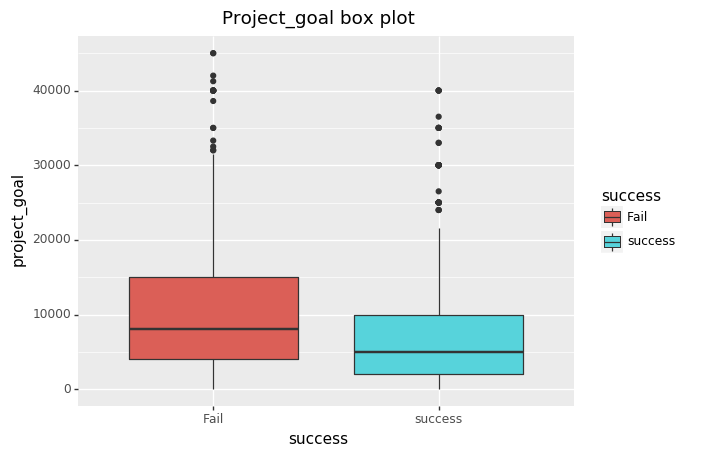

<ggplot: (-9223372029316410652)>

In [11]:
fig = plt.figure()
# graph 객체 생성
# outlier 제거
ggplot(project_goal, aes(x='success', y='project_goal')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Project_goal box plot')
#     + facet_wrap('~Success')

<Figure size 432x288 with 0 Axes>

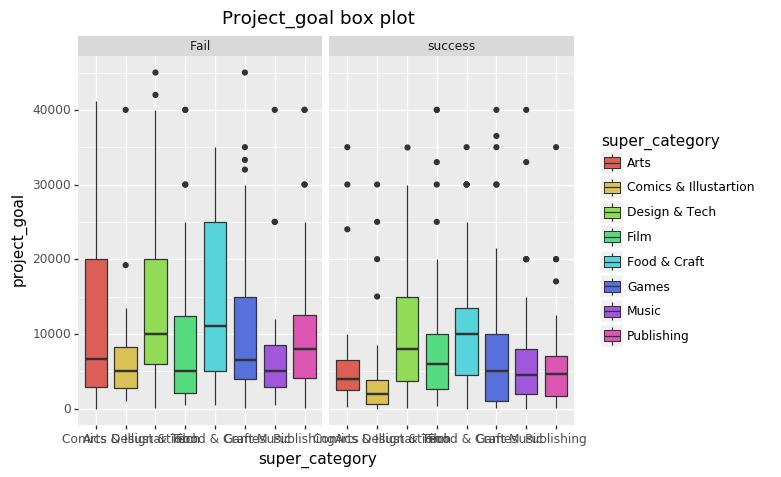

<ggplot: (7538027128)>

In [12]:
fig = plt.figure()
# graph 객체 생성
ggplot(project_goal, aes(x='super_category', y='project_goal')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Project_goal box plot') \
    + facet_wrap('~success')

In [13]:
df.groupby(['success'])['content_img_count'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,500.0,13.208,14.116632,0.0,2.75,9.0,20.0,84.0
success,500.0,19.578,19.952949,0.0,6.00,13.5,28.0,129.0


In [14]:
T_test.T_test(df,'success','content_img_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=20.598582087919798, pvalue=6.353330361636164e-06)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=5.827630732978519, pvalue=7.581730542278046e-09)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

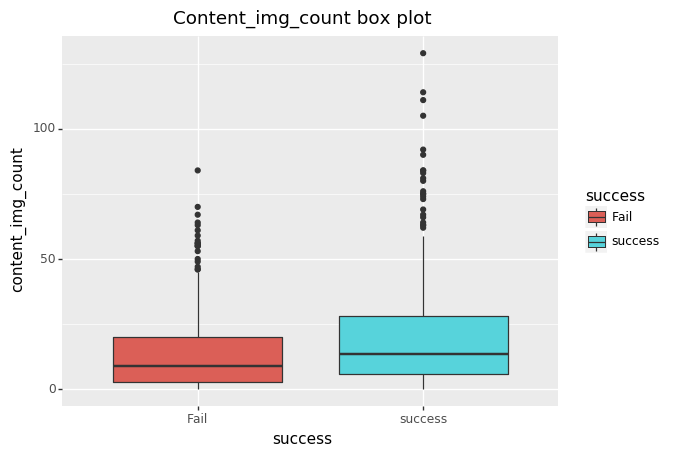

<ggplot: (-9223372029316325916)>

In [15]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='success', y='content_img_count')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Content_img_count box plot')

<Figure size 432x288 with 0 Axes>

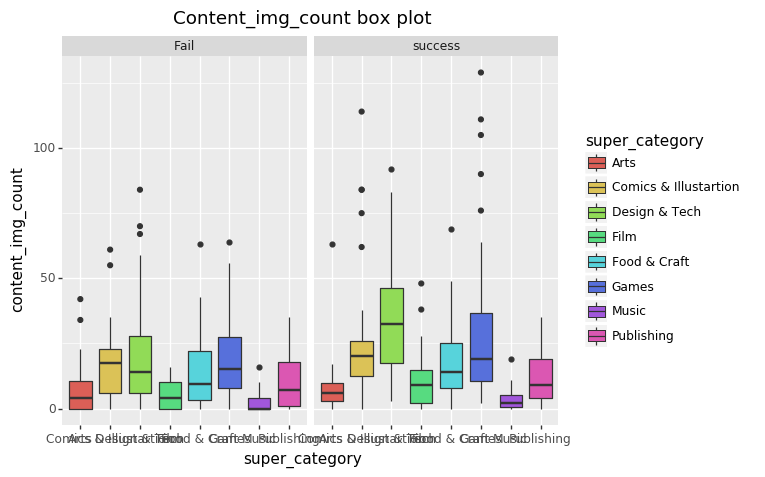

<ggplot: (-9223372029316318874)>

In [16]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='content_img_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Content_img_count box plot') \
    + facet_wrap('~success')

In [17]:
df.groupby(['success'])['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,500.0,32.710,9.861867,8.0,30.0,30.0,35.0,60.0
success,500.0,28.726,7.296671,7.0,26.0,30.0,30.0,60.0


In [18]:
T_test.T_test(df,'success','duration')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=7.183021209163818, pvalue=0.007480898859069096)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=-7.261715463150048, pvalue=7.685227168265162e-13)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

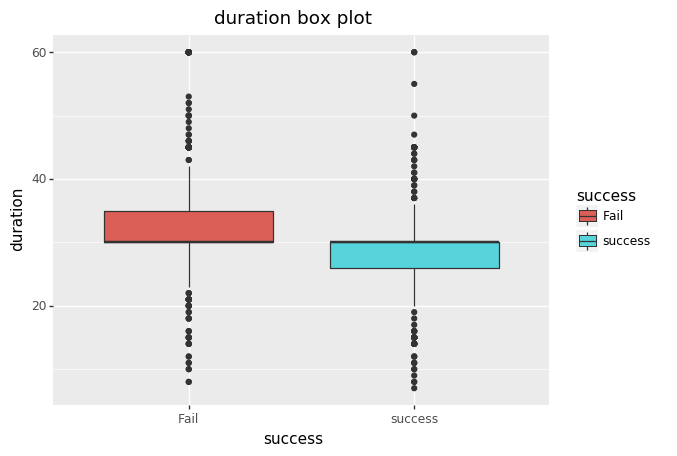

<ggplot: (7538724230)>

In [19]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='success', y='duration')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('duration box plot')

<Figure size 432x288 with 0 Axes>

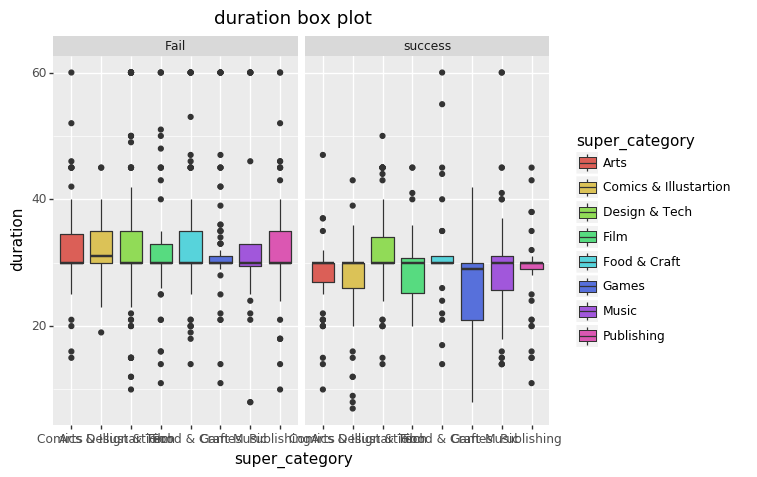

<ggplot: (7538727814)>

In [20]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='duration')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('duration box plot') \
    + facet_wrap('~success')

#### Textual
1.	Project title
2.	Project description
3.	FAQs 
=>  Converted into numerical values by counting the number of words.

In [21]:
df.groupby(['success'])['title_count'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,500.0,33.724,16.794282,4.0,19.00,34.0,50.0,60.0
success,500.0,37.484,15.770579,4.0,24.75,38.0,52.0,60.0


In [22]:
T_test.T_test(df,'success','title_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=5.900834324291286, pvalue=0.015309364601562769)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=3.6494223567539326, pvalue=0.0002764489550568717)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

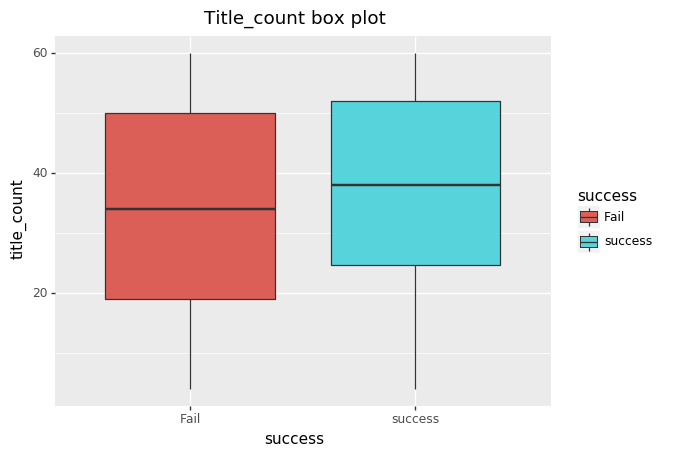

<ggplot: (-9223372029315694669)>

In [23]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='success', y='title_count')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Title_count box plot')

<Figure size 432x288 with 0 Axes>

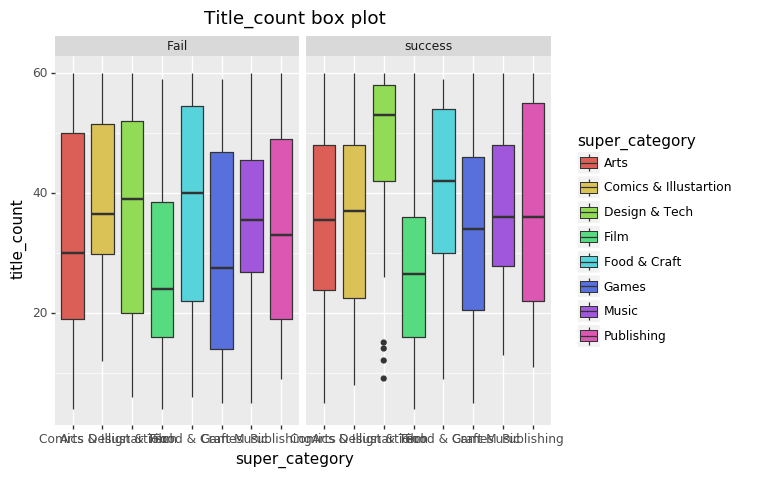

<ggplot: (7539551443)>

In [24]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='title_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Title_count box plot') \
    + facet_wrap('~success')

In [25]:
df.groupby(['success'])['content_text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,500.0,5127.128,3996.248575,189.0,2426.50,4120.5,6443.0,30402.0
success,500.0,6226.432,4309.248315,329.0,3110.75,5307.0,8027.5,31855.0


In [26]:
T_test.T_test(df,'success','content_text_length')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=5.973686645658615, pvalue=0.014693113589565238)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=4.182577621009023, pvalue=3.1357228295042435e-05)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

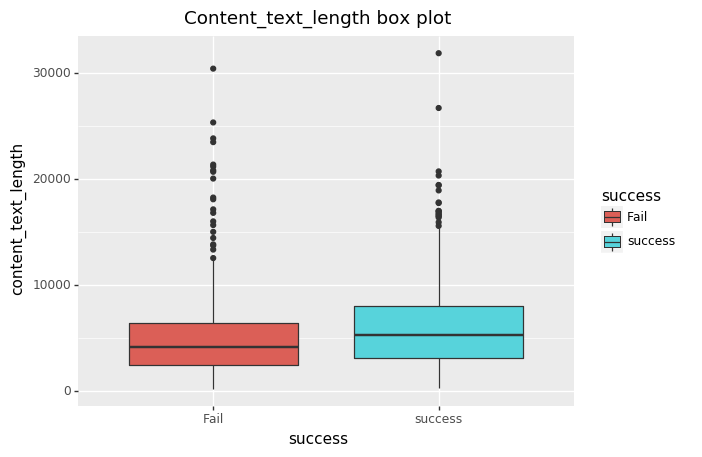

<ggplot: (7538013227)>

In [27]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='success', y='content_text_length')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Content_text_length box plot')

<Figure size 432x288 with 0 Axes>

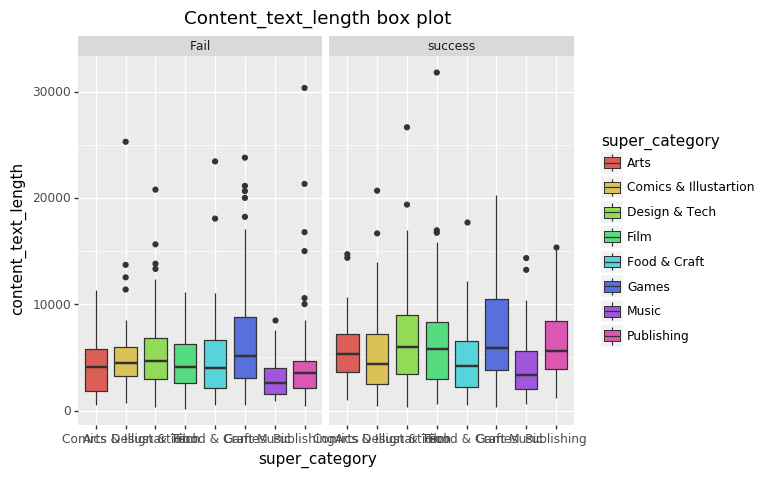

<ggplot: (7538008647)>

In [28]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='content_text_length')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Content_text_length box plot') \
    + facet_wrap('~success')

In [29]:
df.groupby(['success'])['update_count'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,500.0,2.252,4.210457,0.0,0.0,1.0,3.0,39.0
success,500.0,5.434,5.597885,0.0,2.0,4.0,7.0,43.0


In [30]:
T_test.T_test(df,'success','update_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=36.562199103694816, pvalue=2.087291389469213e-09)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=10.157866788794363, pvalue=3.8966009238466484e-23)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


<Figure size 432x288 with 0 Axes>

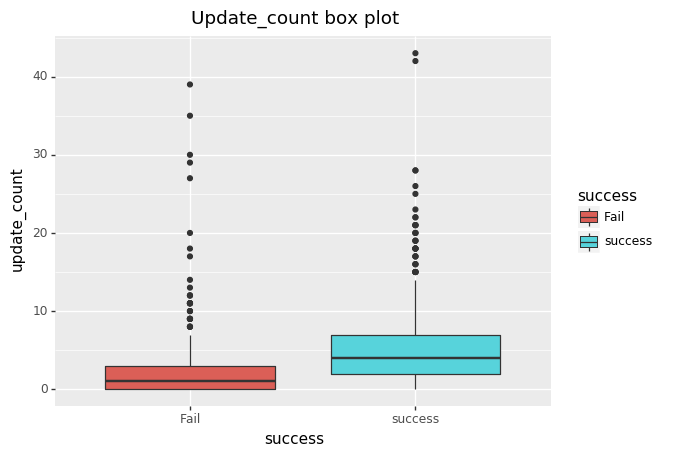

<ggplot: (-9223372029315635498)>

In [31]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='success', y='update_count')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Update_count box plot')

<Figure size 432x288 with 0 Axes>

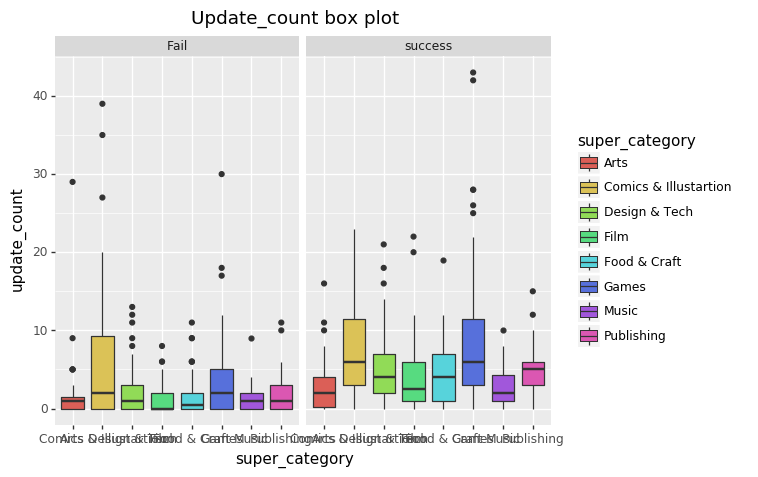

<ggplot: (-9223372029315632124)>

In [32]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='update_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Update_count box plot') \
    + facet_wrap('~success')

#### Categorical
1.	Topic of the project and it's category

<Figure size 72x576 with 0 Axes>

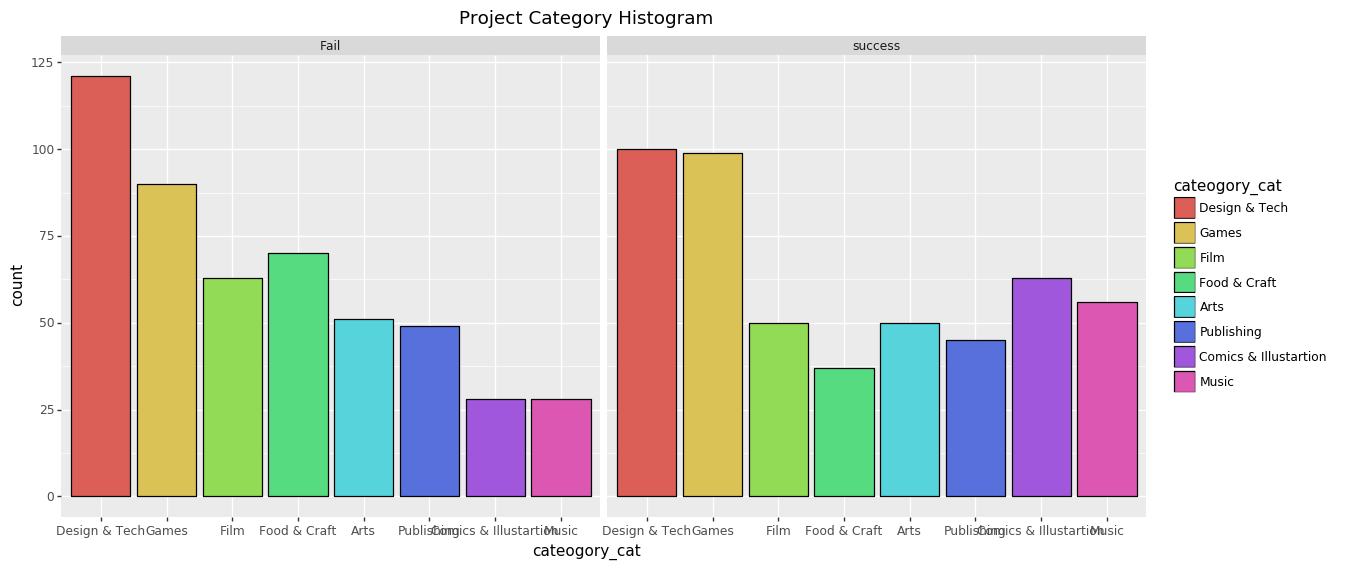

<ggplot: (-9223372029314994330)>

In [33]:
# Determine order and create a categorical type
cateogory_list = df['super_category'].value_counts().index.tolist()
cateogory_cat = CategoricalDtype(categories=cateogory_list, ordered=True)
df['cateogory_cat'] = df['super_category'].astype(str).astype(cateogory_cat)

plt.rcParams['figure.figsize'] = [1, 8]
fig = plt.figure()


# graph 객체 생성
com_plot = ggplot(df, aes('cateogory_cat',fill='cateogory_cat')) \
    + geom_bar(colour="black") \
    + ggtitle('Project Category Histogram') \
    + theme(figure_size=(14, 6))\
    + facet_wrap('~success')
com_plot

In [34]:
pd.DataFrame(df.groupby(['cateogory_cat','success'])['cateogory_cat'].count())

cateogory_cat
cateogory_cat         success               
Design & Tech         Fail               121
                      success            100
Games                 Fail                90
                      success             99
Film                  Fail                63
                      success             50
Food & Craft          Fail                70
                      success             37
Arts                  Fail                51
                      success             50
Publishing            Fail                49
                      success             45
Comics & Illustartion Fail                28
                      success             63
Music                 Fail                28
                      success             56

#### From project creators
Number of 
1.	Projects created
2.	Projects backed by the creator


In [35]:
df.groupby(['success'])['created_count'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,500.0,1.692,2.055623,1.0,1.0,1.0,1.0,19.0
success,500.0,3.222,5.745846,1.0,1.0,1.0,3.0,42.0


In [36]:
T_test.T_test(df,'success','created_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=31.42963330963058, pvalue=2.675839613328948e-08)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=5.606213812336323, pvalue=2.6758396133276804e-08)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


<Figure size 72x576 with 0 Axes>

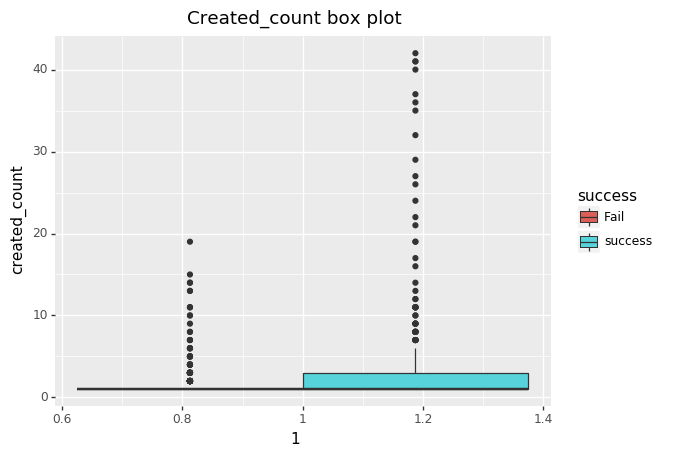

<ggplot: (7540203156)>

In [37]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x=1, y='created_count')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Created_count box plot')

<Figure size 72x576 with 0 Axes>

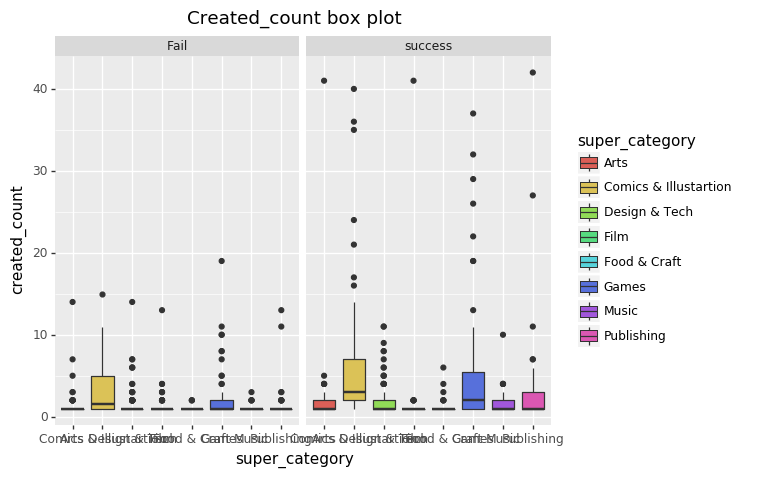

<ggplot: (-9223372029314798697)>

In [38]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='created_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Created_count box plot') \
    + facet_wrap('~success')

In [39]:
df['backed_count'] = df['backed_count'].apply(lambda x : 0 if x =='None' else x)
df['backed_count'] = df['backed_count'].apply(lambda x : float(x))

df.groupby(['success'])['backed_count'].describe()

,count,mean,std,min,25%,50%,75%,max
success,,,,,,,,
Fail,500.0,2.220,12.663504,0.0,0.0,0.0,0.0,195.0
success,500.0,6.846,25.223615,0.0,0.0,0.0,2.0,356.0


In [40]:
T_test.T_test(df,'success','backed_count')

---------------------------------------------
중심극한정리에 따라서 두 분포 모두 정규분포를 따른다.
---------------------------------------------
Levene 등분산성 검정
LeveneResult(statistic=13.432091594892373, pvalue=0.0002603830416943223)
=> H1 : 두 집단의 분산은 다르다
---------------------------------------------
T-test
Ttest_indResult(statistic=3.6649818000765535, pvalue=0.0002603830416942014)
Welcht-test
=> H1 : 두 집단의 평균은 다르다


/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


<Figure size 72x576 with 0 Axes>

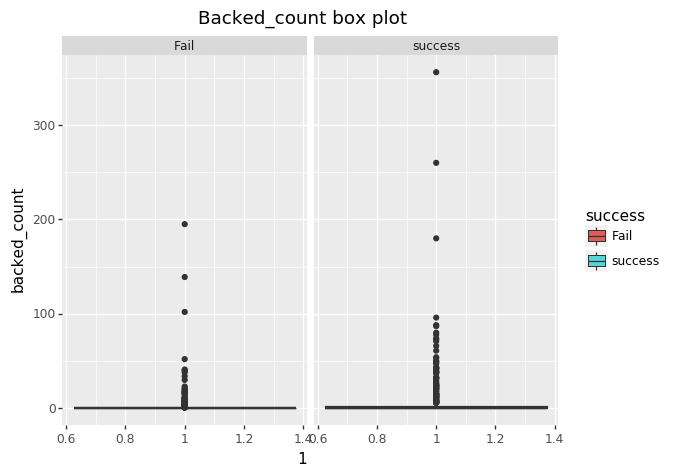

<ggplot: (7538691336)>

In [41]:
df['backed_count'] = df['backed_count'].apply(lambda x : 0 if x =='None' else x)
df['backed_count'] = df['backed_count'].apply(lambda x : float(x))
# outlier 제거
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x=1, y='backed_count')) \
    + geom_boxplot(aes(fill='success')) \
    + ggtitle('Backed_count box plot') \
    + facet_wrap('~success')

<Figure size 72x576 with 0 Axes>

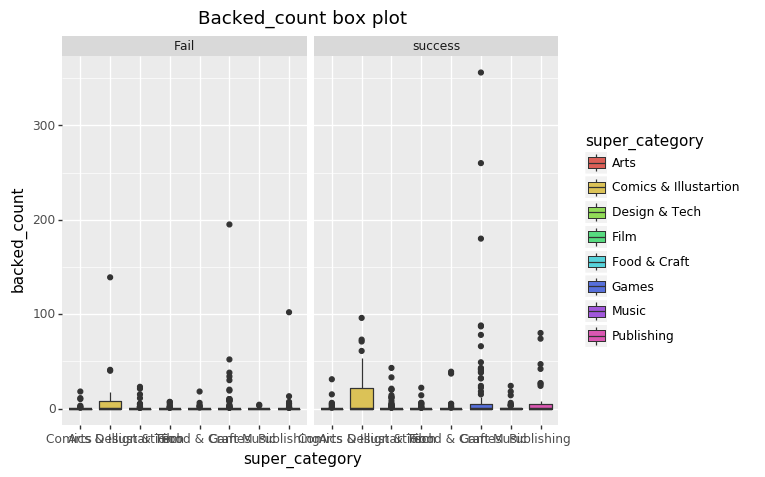

<ggplot: (-9223372029316778450)>

In [42]:
fig = plt.figure()
# graph 객체 생성
ggplot(df, aes(x='super_category', y='backed_count')) \
    + geom_boxplot(aes(fill='super_category')) \
    + ggtitle('Backed_count box plot') \
    + facet_wrap('~success')

#### Temporal
The accumulation over the first three days in terms of 
1.	The number of backers
2.	The funding amount

In [43]:
df_1 = df[['success','backer1']]
df_1['back_variable'] = '1backer'
df_1.rename(columns={'Success':'success','backer1':'backer','back_variable':'variable'},inplace=True)

df_2 = df[['success','backer2']]
df_2['back_variable'] = '2backer'
df_2.rename(columns={'Success':'success','backer2':'backer','back_variable':'variable'},inplace=True)

df_3 = df[['success','backer3']]
df_3['back_variable'] = '3backer'
df_3.rename(columns={'Success':'success','backer3':'backer','back_variable':'variable'},inplace=True)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [44]:
back_concat_df = pd.concat([df_1,df_2,df_3])

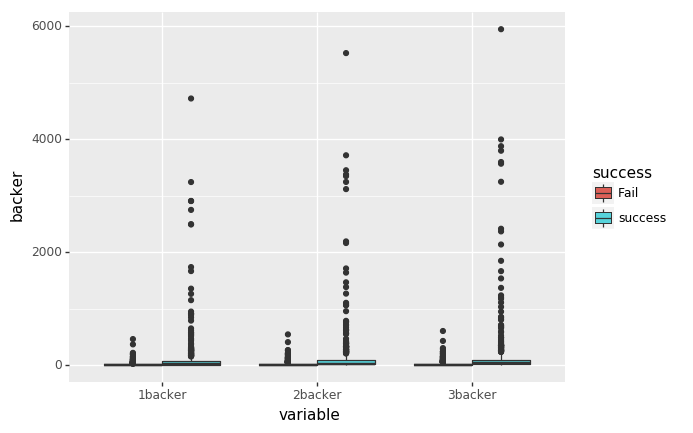

<ggplot: (-9223372029316733173)>

In [45]:
ggplot(back_concat_df, aes(x='variable',y='backer')) \
    + geom_boxplot(aes(fill='success'))

In [46]:
df_1 = df[['success','ratio1']]
df_1['variable'] = '1day'
df_1.rename(columns={'success':'success','ratio1':'ratio','variable':'variable'},inplace=True)

df_2 = df[['success','ratio2']]
df_2['variable'] = '2day'
df_2.rename(columns={'success':'success','ratio2':'ratio','variable':'variable'},inplace=True)

df_3 = df[['success','ratio3']]
df_3['variable'] = '3day'
df_3.rename(columns={'success':'success','ratio3':'ratio','variable':'variable'},inplace=True)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [47]:
filter_df1 = filter_outlier(df_1,'ratio')
filter_df2 = filter_outlier(df_2,'ratio')
filter_df3 = filter_outlier(df_3,'ratio')

Number of filtered value : 862, Removed number of value : 138
Number of filtered value : 867, Removed number of value : 133
Number of filtered value : 866, Removed number of value : 134


In [48]:
concat_df = pd.concat([filter_df1,filter_df2,filter_df3])

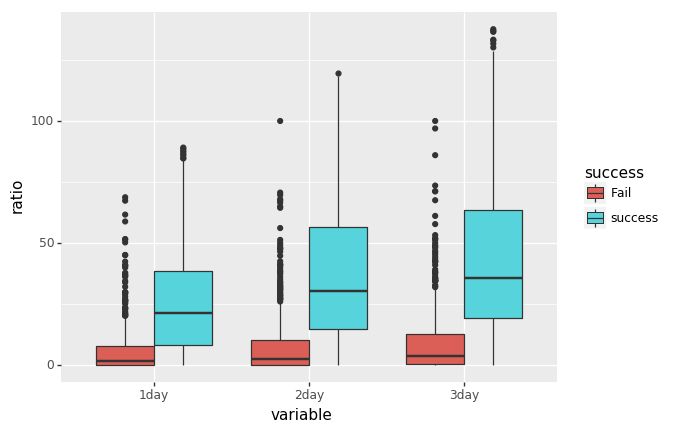

<ggplot: (7538703059)>

In [49]:
ggplot(concat_df, aes(x='variable',y='ratio')) \
    + geom_boxplot(aes(fill='success'))